In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report

In [2]:

# Load dataset
df = pd.read_csv('creditcard.csv')

In [3]:

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [7]:

# Predict probabilities for Precision-Recall curve
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

In [8]:

# Compute precision-recall pairs
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_scores)
auc_lr = auc(recall_lr, precision_lr)

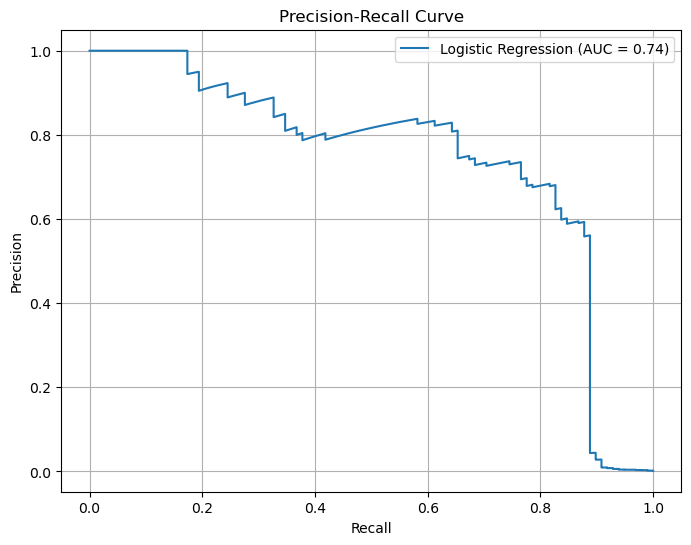

In [9]:

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()